In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
from sklearn.datasets import fetch_openml

# Load the Boston Housing dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Display the first 5 rows
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
# Check for missing values
print(df.isnull().sum())

# Basic information about the dataset
print(df.info())

# Statistical summary
print(df.describe())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None
             CRI

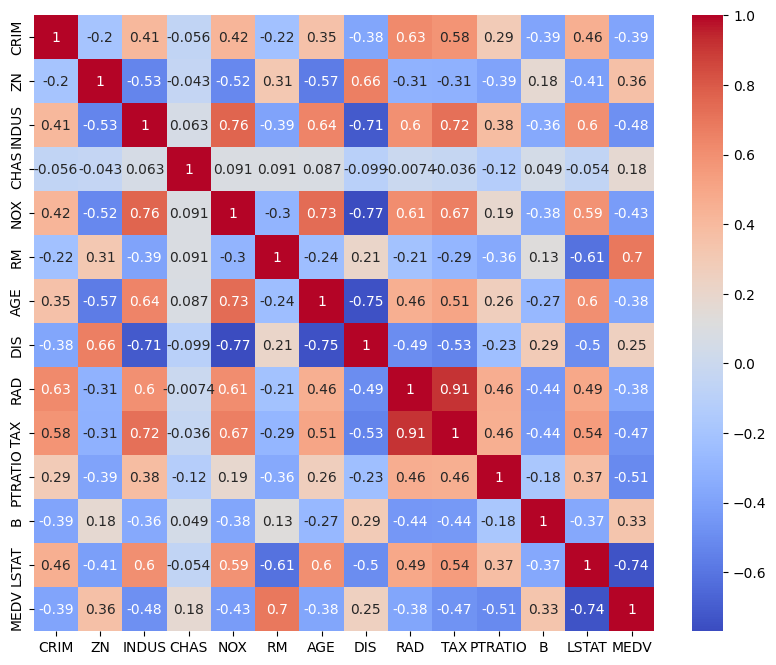

In [7]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

# Select key features and the target variable
features = df[['RM', 'LSTAT']]
target = df['MEDV']

# Normalize the features using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Display the first 5 rows of the scaled features
print(features_scaled[:5])


[[ 0.41367189 -1.0755623 ]
 [ 0.19427445 -0.49243937]
 [ 1.28271368 -1.2087274 ]
 [ 1.01630251 -1.36151682]
 [ 1.22857665 -1.02650148]]


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (404, 2)
Testing set shape: (102, 2)


In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 31.24
R² Score: 0.57


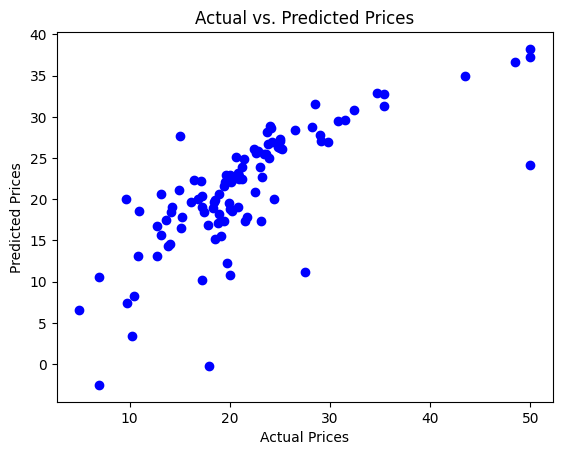

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted prices
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()


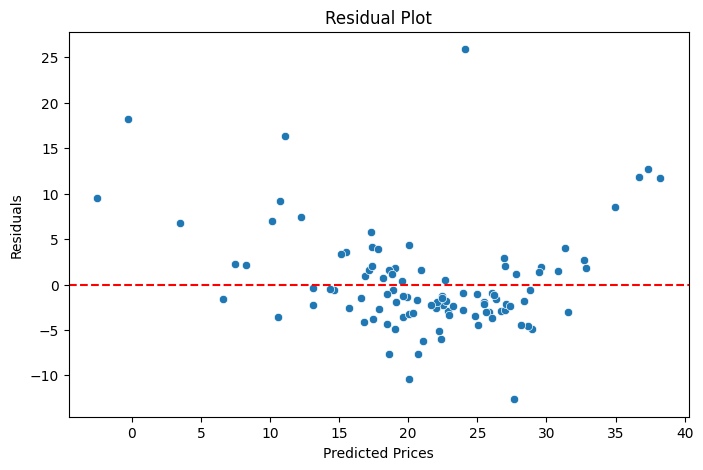

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [17]:
# Assume df was your original DataFrame
X = df[['CRIM', 'RM', 'LSTAT']]  # Example feature selection


In [19]:
feature_names = df.drop(columns=['MEDV']).columns


In [21]:
print(X_train.shape)
print(model.coef_.shape)


(404, 2)
(2,)


In [22]:
print(feature_names)  # Ensure this has exactly 2 features


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [23]:
feature_names = ['Feature_1', 'Feature_2']  # Replace with your actual 2 feature names


In [24]:
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
print(coef_df)


     Feature  Coefficient
0  Feature_1     3.836076
1  Feature_2    -4.512246


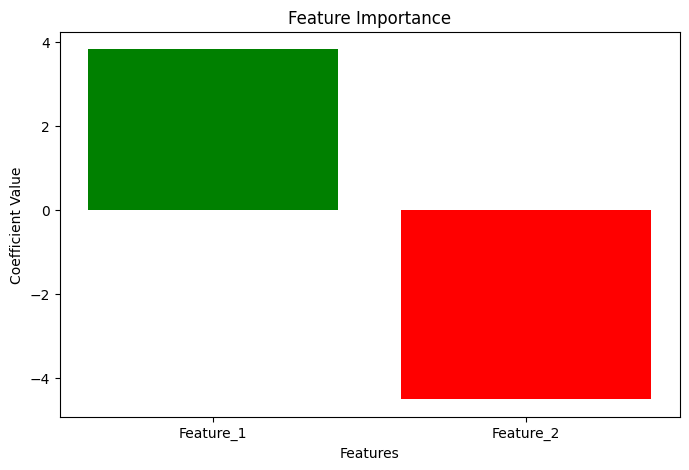

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color=['green', 'red'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)  # Predict on the test set
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R² score:', r2_score(y_test, y_pred))


MSE: 31.243290601783638
MAE: 3.898759721382358
R² score: 0.5739577415025857
